In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('HousePrice.csv', encoding = 'unicode_escape')

In [31]:
df.shape

(4600, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [33]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Feature Engineering

In [34]:
df['country'].unique()

array(['USA'], dtype=object)

In [35]:
# Drop countries since all the houses belong to USA
df.drop('country', axis = 1, inplace = True)

In [36]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [37]:
# Drop cities for now since too many values, will too many new columns while hot-encoding.
df.drop('city', axis = 1, inplace = True)

In [38]:
# Drop the following columns:
# 'date': unlikely to affect the value of a house,  already captured by 'yr_built' and 'yr_renovated'
# 'sqft_lot, sqft_above, sqft_basement': redundant with 'sqft_living'
# 'street, statezip': redundant with 'city', do not add much value
# 'waterfront, view': may influenece prices but could add unnececary noise
df.drop(['date', 'sqft_lot', 'sqft_above', 'sqft_basement', 'street', 'statezip', 'waterfront', 'view'], axis = 1, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4600 non-null   float64
 1   bedrooms      4600 non-null   int64  
 2   bathrooms     4600 non-null   float64
 3   sqft_living   4600 non-null   int64  
 4   floors        4600 non-null   float64
 5   condition     4600 non-null   int64  
 6   yr_built      4600 non-null   int64  
 7   yr_renovated  4600 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 287.6 KB


EDA

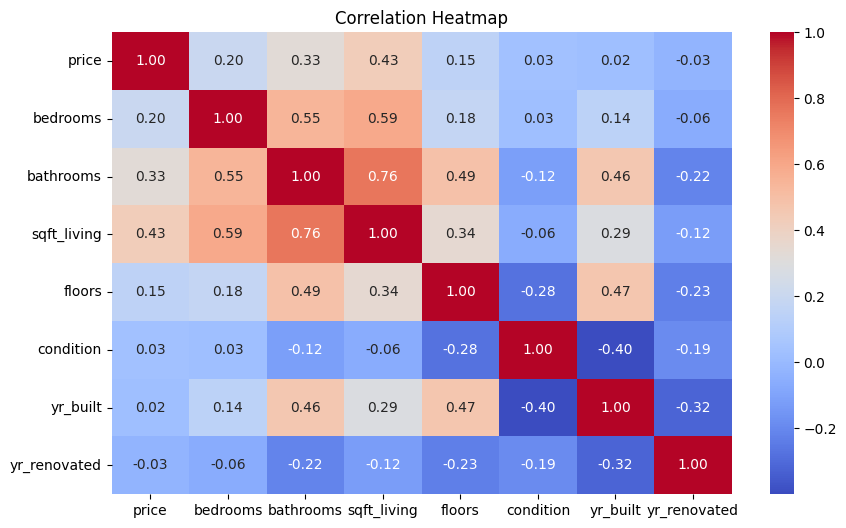

In [40]:
# Correlation heatmap (to see which features relate most to price)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

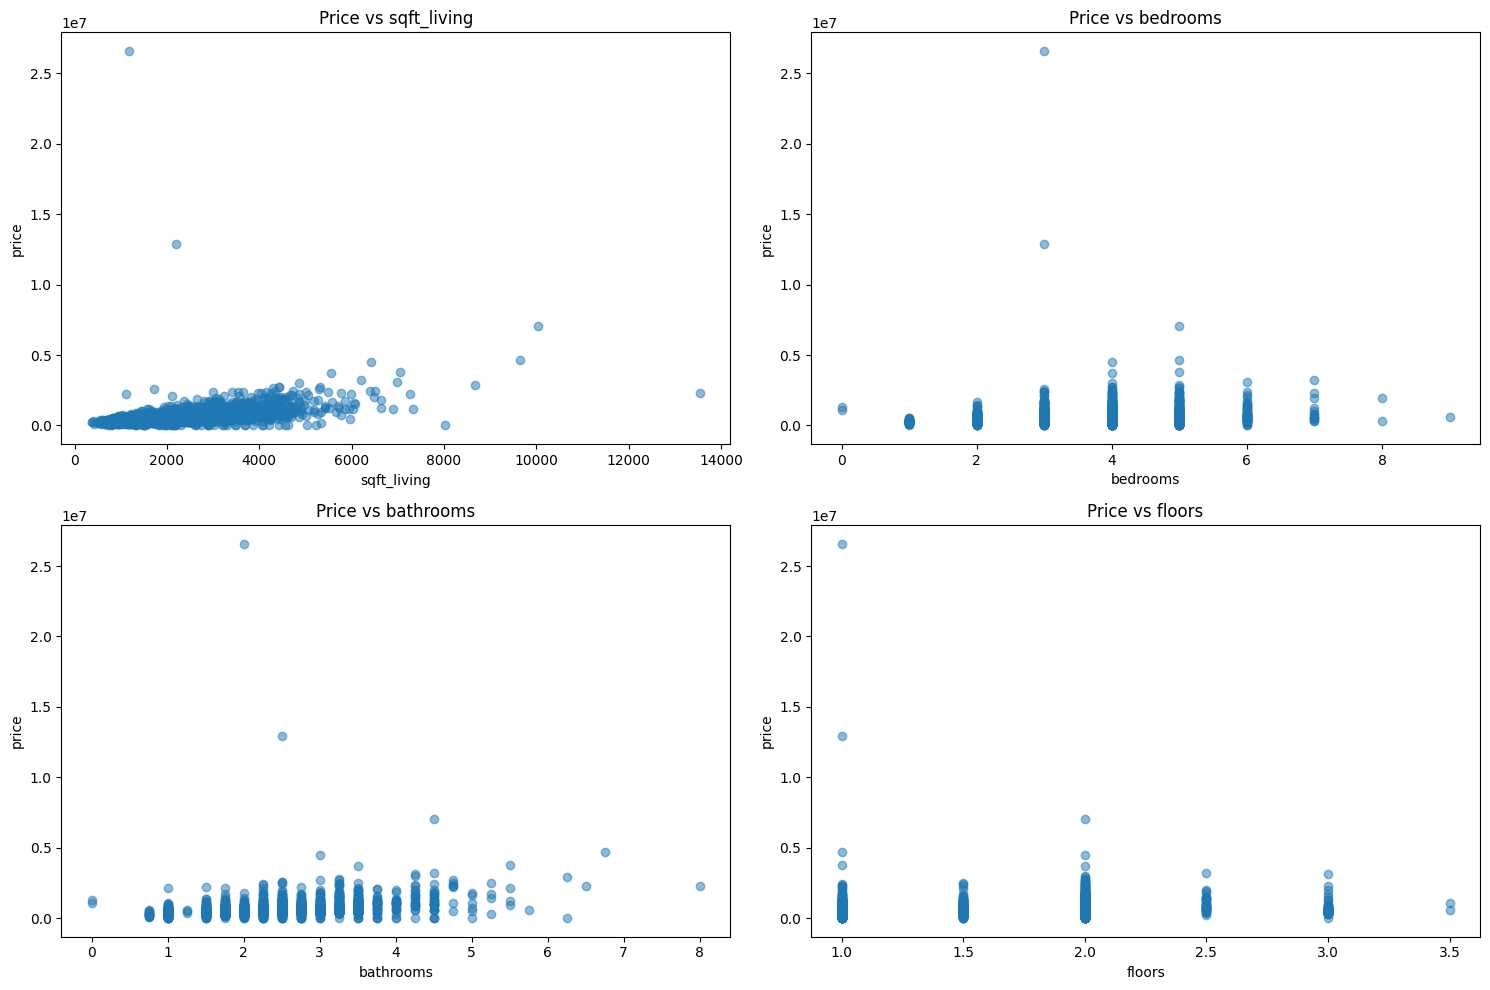

In [41]:
# Scatter plots for important features
features = ["sqft_living", "bedrooms", "bathrooms", "floors"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df["price"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("price")
    plt.title(f"Price vs {col}")

plt.tight_layout()
plt.show()

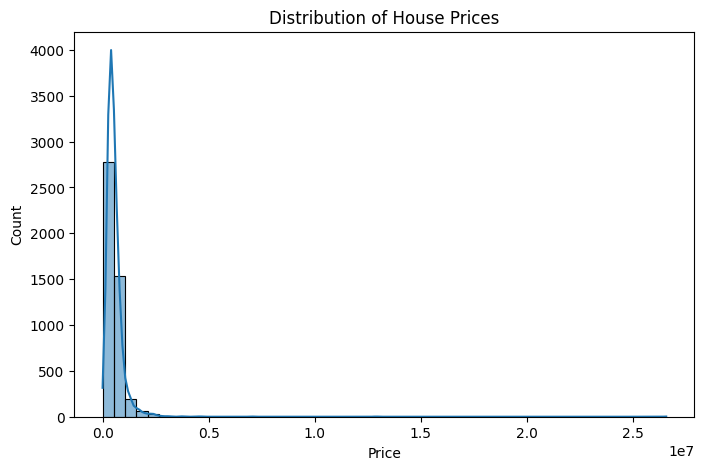

In [42]:
# Distribution of price (to check skew/outliers)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Model Training and Testing

In [43]:
# Only use most relevant features to train model i.e sqft_living, bathrooms, bedrooms.
# floors redundant since sqft_living is included.
# condition, yr_built, yr_renovated don't really affect prices as seen in the heatmap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = df[["sqft_living", "bedrooms", "bathrooms"]]
y = df["price"]

print(X, '\n\n', y)

      sqft_living  bedrooms  bathrooms
0            1340         3       1.50
1            3650         5       2.50
2            1930         3       2.00
3            2000         3       2.25
4            1940         4       2.50
...           ...       ...        ...
4595         1510         3       1.75
4596         1460         3       2.50
4597         3010         3       2.50
4598         2090         4       2.00
4599         1490         3       2.50

[4600 rows x 3 columns] 

 0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [44]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("RMSE:", rmse)
print("R² Score:", r2)

Intercept: 111106.3555450245
Coefficients: [   304.61395285 -61954.8250373   -3226.33739374]
RMSE: 995592.7052346641
R² Score: 0.02808413801628229


In [49]:
# Log-transform target
y = np.log(df["price"])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
# Keep only rows with price > 0
df = df[df["price"] > 0].copy()

# Log-transform safely
y = np.log(df["price"])

# Redo the train-test split
X = df[["sqft_living", "bedrooms", "bathrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
print(np.isfinite(y_train).all())   # Should be True

True


In [55]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predictions (in log scale)
y_pred_log = model.predict(X_test)

In [57]:
# Evaluate in log space
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("Intercept (log scale):", model.intercept_)
print("Coefficients (log scale):", model.coef_)
print("MSE (log scale):", mse_log)
print("R² Score (log scale):", r2_log)

Intercept (log scale): 12.284505197501051
Coefficients (log scale): [ 0.00037249 -0.05552328  0.08188384]
MSE (log scale): 0.1599333747613823
R² Score (log scale): 0.4540128569381683


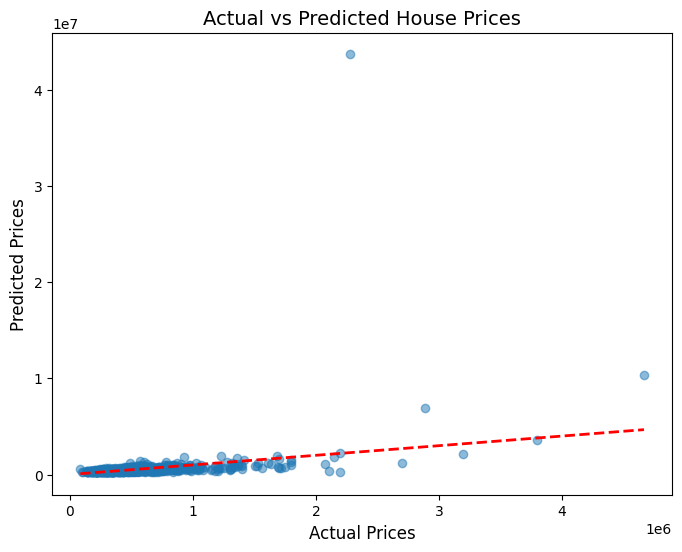

In [59]:
# Back-transform both actual and predicted values
y_test_actual = np.exp(y_test)
y_pred_actual = np.exp(y_pred_log)

# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color="red", linestyle="--", linewidth=2)  # perfect prediction line

plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs Predicted House Prices", fontsize=14)
plt.show()